In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px # Data vizualization
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder

In [2]:
df=pd.read_excel('Online Retail.xlsx') ## read the xlsx file

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
# Calculate the percentage of missing values in each column of the used car DataFrame to know which column i will deal with handle the missing data in
persentage_of_missing = df.isnull().sum().sort_values(ascending=False) * 100 / len(df)
persentage_of_missing

CustomerID     24.926694
Description     0.268311
InvoiceNo       0.000000
StockCode       0.000000
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
Country         0.000000
dtype: float64

## I will assume that i contacted the company and they told me that the missing values in the customer ID is a error from them and these transactions never exist so i will remove them 

In [6]:
df2=df.dropna()

In [7]:
# Calculate the percentage of missing values in each column of  the DataFrame to know which column i will deal with handle the missing data in
persentage_of_missing = df2.isnull().sum().sort_values(ascending=False) * 100 / len(df)
persentage_of_missing

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

## by seeing this i have found in the quantity column that there is a negative value and this is not right and also in the unit price there is a zero so i will also assume that the company told me that the negative in the quantity is typo so will make an abs to the values to get sure that they are all positive values and remove the unit price that are = 0 

In [8]:
df2.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406829.000000,406829,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,248.693370,NaN,69.315162,1713.600303


In [9]:
df2['Quantity'] = df2['Quantity'].abs()


/var/folders/lr/gy03_h7s1dj6650y9pvy94pw0000gn/T/ipykernel_13997/419233862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Quantity'] = df2['Quantity'].abs()


In [10]:
df2.drop(df2[df2['UnitPrice'] == 0].index, axis=0, inplace=True)


/var/folders/lr/gy03_h7s1dj6650y9pvy94pw0000gn/T/ipykernel_13997/4292454512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(df2[df2['UnitPrice'] == 0].index, axis=0, inplace=True)


In [11]:
df2.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406789.000000,406789,406789.000000,406789.000000
mean,13.379467,2011-07-10 16:28:44.845459968,3.460811,15287.795830
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13954.000000
50%,5.000000,2011-07-31 11:46:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,247.858601,NaN,69.318561,1713.573064


## i left the maximum number in the quantity column high as it is because in the dataset information they said that many of the customers are wholesalers

In [12]:
## here i will remove the columns that i won't use 
# Assuming df is your DataFrame and columns_to_drop is a list of column names you want to remove
columns_to_drop = ['Description', 'StockCode']  # Add column names you want to drop to this list

# Drop the specified columns
df2 = df2.drop(columns=columns_to_drop)

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406789 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406789 non-null  object        
 1   Quantity     406789 non-null  int64         
 2   InvoiceDate  406789 non-null  datetime64[ns]
 3   UnitPrice    406789 non-null  float64       
 4   CustomerID   406789 non-null  float64       
 5   Country      406789 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 21.7+ MB


In [14]:
df2['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

## here i wanted to see how many countries i will be dealing with and i found that they are 38 different countries so making the one hot encoding will make alot of problems like Dimensionality Increase so i will consider another approch i will make another column named continent to deal with fewer categorical data so i can use label encoder as it will be minimzed to 7 

In [15]:
# Define a mapping of countries to continents
country_to_continent = {
    'United Kingdom': 'Europe',
    'France': 'Europe',
    'Australia': 'Australia',
    'Netherlands': 'Europe',
    'Germany': 'Europe',
    'Norway': 'Europe',
    'EIRE': 'Europe',
    'Switzerland': 'Europe',
    'Spain': 'Europe',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Italy': 'Europe',
    'Belgium': 'Europe',
    'Lithuania': 'Europe',
    'Japan': 'Asia',
    'Iceland': 'Europe',
    'Channel Islands': 'Europe',
    'Denmark': 'Europe',
    'Cyprus': 'Europe',
    'Sweden': 'Europe',
    'Austria': 'Europe',
    'Israel': 'Asia',
    'Finland': 'Europe',
    'Greece': 'Europe',
    'Singapore': 'Asia',
    'Lebanon': 'Asia',
    'United Arab Emirates': 'Asia',
    'Saudi Arabia': 'Asia',
    'Czech Republic': 'Europe',
    'Canada': 'North America',
    'Unspecified': 'Other',
    'Brazil': 'South America',
    'USA': 'North America',
    'European Community': 'Europe',
    'Bahrain': 'Asia',
    'Malta': 'Europe',
    'RSA': 'Africa'
}

# Map countries to continents and create a new 'continent' column
df2['Continent'] = df2['Country'].map(country_to_continent)


In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406789 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406789 non-null  object        
 1   Quantity     406789 non-null  int64         
 2   InvoiceDate  406789 non-null  datetime64[ns]
 3   UnitPrice    406789 non-null  float64       
 4   CustomerID   406789 non-null  float64       
 5   Country      406789 non-null  object        
 6   Continent    406789 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 24.8+ MB


In [17]:
df2.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Continent
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Europe
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Europe
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Europe
3,536365,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Europe
4,536365,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Europe


In [18]:
## now i will drop the country column 
del df2['Country']

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406789 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406789 non-null  object        
 1   Quantity     406789 non-null  int64         
 2   InvoiceDate  406789 non-null  datetime64[ns]
 3   UnitPrice    406789 non-null  float64       
 4   CustomerID   406789 non-null  float64       
 5   Continent    406789 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 21.7+ MB


### Now that the dataset appears to be in good condition, our focus is shifting towards customer segmentation. In order to accomplish this, i will transform the current sales data into a customer-level perspective.
### i will use the RFM marketing Metrics, to look at customer's behaviours based on:

### Recency: How many days had passed since customer last purchased. 
### Frequency: - How many times a customer had shopped here.
### Monetary Value: - How much money had the customer spent.(excluding the cancelled orders that there inovice no. start with letter c as mentioned in the dataset info
### but in addition to that i will add the continent column 

In [21]:
# Filter out cancelled orders
cancelled_orders = df2[df2['InvoiceNo'].astype(str).str.startswith('C')]

# Extract the invoice number without 'C' for cancelled orders
cancelled_orders['InvoiceNumber'] = cancelled_orders['InvoiceNo'].str[1:]

# Check if there exists a corresponding non-cancelled invoice number
corresponding_non_cancelled_orders = df2[~df2['InvoiceNo'].astype(str).str.startswith('C')]
corresponding_non_cancelled_orders['Has_Corresponding_Non_Cancelled'] = corresponding_non_cancelled_orders['InvoiceNo'].isin(cancelled_orders['InvoiceNumber'])

# Display the result
print(corresponding_non_cancelled_orders)


       InvoiceNo  Quantity         InvoiceDate  UnitPrice  CustomerID   
0         536365         6 2010-12-01 08:26:00       2.55     17850.0  \
1         536365         6 2010-12-01 08:26:00       3.39     17850.0   
2         536365         8 2010-12-01 08:26:00       2.75     17850.0   
3         536365         6 2010-12-01 08:26:00       3.39     17850.0   
4         536365         6 2010-12-01 08:26:00       3.39     17850.0   
...          ...       ...                 ...        ...         ...   
541904    581587        12 2011-12-09 12:50:00       0.85     12680.0   
541905    581587         6 2011-12-09 12:50:00       2.10     12680.0   
541906    581587         4 2011-12-09 12:50:00       4.15     12680.0   
541907    581587         4 2011-12-09 12:50:00       4.15     12680.0   
541908    581587         3 2011-12-09 12:50:00       4.95     12680.0   

       Continent  Has_Corresponding_Non_Cancelled  
0         Europe                            False  
1         Europe   

/var/folders/lr/gy03_h7s1dj6650y9pvy94pw0000gn/T/ipykernel_13468/4229835273.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancelled_orders['InvoiceNumber'] = cancelled_orders['InvoiceNo'].str[1:]
/var/folders/lr/gy03_h7s1dj6650y9pvy94pw0000gn/T/ipykernel_13468/4229835273.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corresponding_non_cancelled_orders['Has_Corresponding_Non_Cancelled'] = corresponding_non_cancelled_orders['InvoiceNo'].isin(cancelled_orders['InvoiceNumber'])


In [23]:
corresponding_non_cancelled_orders['Has_Corresponding_Non_Cancelled'].unique()

array([False])

In [22]:
# Initialize an empty list to store total prices
total_prices = []

# Iterate over each row in the DataFrame
for index, row in df2.iterrows():
    # Convert the 'InvoiceNo' value to string
    invoice_no = str(row['InvoiceNo'])
    
    # Check if the invoice number does not start with 'C' (i.e., valid purchase)
    if not invoice_no.startswith('C'):
        # Calculate the total price and append it to the list
        total_price = row['Quantity'] * row['UnitPrice']
        total_prices.append(total_price)
    else:
        # For cancelled orders, set the total price to 0
        total_prices.append(0)

# Add the list of total prices as a new column to the DataFrame
df2['TotalPrice'] = total_prices



In [23]:
# Get the most recent date in the 'InvoiceDate' column
most_recent_date = df2['InvoiceDate'].max()

# Group the DataFrame by 'CustomerID' and aggregate the data
customer_df = df2.groupby('CustomerID').agg({
    'Continent': 'first',  # Take the first occurrence of 'continent' for each customer
    'InvoiceDate': lambda x: (most_recent_date - x.max()).days,  # Calculate recency
    'InvoiceNo': 'count',  # Count number of visits
    'TotalPrice': 'sum',  # Sum of TotalPrice for monetary value
})

# Rename the columns for clarity
customer_df.rename(columns={'InvoiceDate':'Recency', 'InvoiceNo':'Visits', 'TotalPrice':'Monetary'}, inplace=True)


# Display the first 5 rows of the resulting DataFrame
customer_df.head(5)


,Continent,Recency,Visits,Monetary
CustomerID,,,,
12346.0,Europe,325,2,77183.60
12347.0,Europe,1,182,4310.00
12348.0,Europe,74,31,1797.24
12349.0,Europe,18,73,1757.55
12350.0,Europe,309,17,334.40


In [24]:
customer_df.info() ## now i have the dataset grouped by the customer and i have all the informations i want for every customer

<class 'pandas.core.frame.DataFrame'>
Index: 4371 entries, 12346.0 to 18287.0
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Continent  4371 non-null   object 
 1   Recency    4371 non-null   int64  
 2   Visits     4371 non-null   int64  
 3   Monetary   4371 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 170.7+ KB


## now i will make the label encoding for the continent column so i can deal with

In [25]:
from sklearn.preprocessing import LabelEncoder

# Get unique continents
unique_continents = customer_df['Continent'].unique()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder to unique continents and transform
continent_labels = label_encoder.fit_transform(unique_continents)

# Create a dictionary to map continents to label encoded numbers
continent_mapping = dict(zip(unique_continents, continent_labels))

# Print the continent mapping
print("Continent Mapping:")
for continent, label in continent_mapping.items():
    print(f"{continent}: {label}")


Continent Mapping:
Europe: 3
Asia: 1
Other: 5
Australia: 2
Africa: 0
North America: 4
South America: 6


In [26]:
from sklearn.preprocessing import LabelEncoder

# Get unique continents
unique_continents = customer_df['Continent'].unique()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder to unique continents and transform
customer_df['Continent_Encoded'] = label_encoder.fit_transform(customer_df['Continent'])

# Drop the original 'continent' column
customer_df.drop(columns=['Continent'], inplace=True)

# Display the first 5 rows of the resulting DataFrame
customer_df.head(5)


,Recency,Visits,Monetary,Continent_Encoded
CustomerID,,,,
12346.0,325,2,77183.60,3
12347.0,1,182,4310.00,3
12348.0,74,31,1797.24,3
12349.0,18,73,1757.55,3
12350.0,309,17,334.40,3


## Standardize the customer dataframe using StandardScaler: Standardizing the data using StandardScaler ensures that all the variables are on the same scale, which is necessary for K-means clustering.

In [27]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4371 entries, 12346.0 to 18287.0
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Recency            4371 non-null   int64  
 1   Visits             4371 non-null   int64  
 2   Monetary           4371 non-null   float64
 3   Continent_Encoded  4371 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 170.7 KB


In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
norm_df = scaler.fit_transform(customer_df)
norm_df

array([[ 2.32173944e+00, -3.91785125e-01,  8.39047870e+00,
         4.16433514e-02],
       [-8.93869573e-01,  3.82617649e-01,  2.53601089e-01,
         4.16433514e-02],
       [-1.69365072e-01, -2.67020234e-01, -2.69671903e-02,
         4.16433514e-02],
       ...,
       [-8.34321258e-01, -3.44460512e-01, -2.07761756e-01,
         4.16433514e-02],
       [-8.74020134e-01,  2.85210205e+00,  6.26652196e-03,
         4.16433514e-02],
       [-4.86956086e-01, -9.92329664e-02, -2.24964275e-02,
         4.16433514e-02]])

In [29]:
import os
os.environ["OPENBLAS_NUM_THREADS"] = "1"


Text(0, 0.5, 'Inertia')

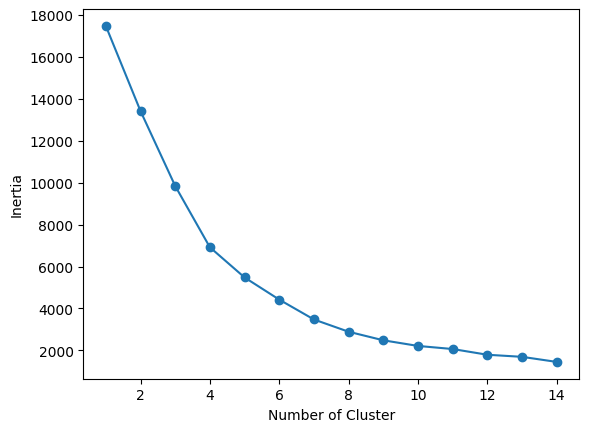

In [30]:
from sklearn.cluster import KMeans

# List to store the inertia values for different k values
inertia = []

# Loop over different values of k
for k in range(1, 15):
    # Create KMeans model with k clusters
    kmeans = KMeans(n_clusters=k, n_init=14, random_state=0)
    
    # Fit the model to the normalized data
    kmeans.fit(norm_df)
    
    # Append the inertia value to the list
    inertia.append(kmeans.inertia_)
plt.plot(range(1,15), 
         inertia,
         marker='o')
plt.xlabel('Number of Cluster')
plt.ylabel('Inertia')

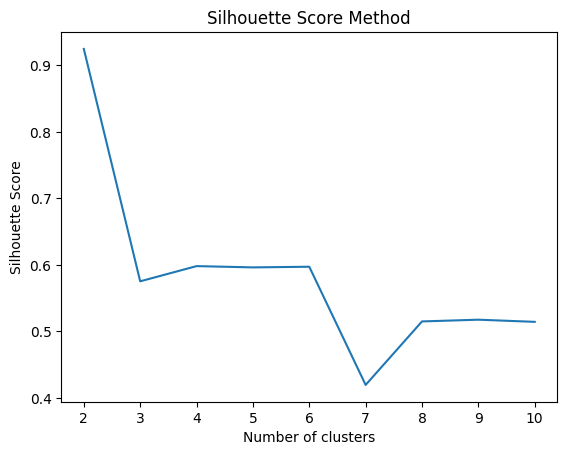

In [31]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(norm_df)
    silhouette_scores.append(silhouette_score(norm_df, labels))

plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()


In [32]:
final_kmeans = KMeans(n_clusters=5,random_state=42)
final_kmeans.fit(norm_df)

KMeans(n_clusters=5, random_state=42)

In [33]:
final_df = pd.DataFrame(customer_df, columns=customer_df.columns, index=customer_df.index)
final_df['Cluster'] = final_kmeans.labels_ + 1 # I want to have cluster labels starting from 1 instead of 0
final_df.head(10)

,Recency,Visits,Monetary,Continent_Encoded,Cluster
CustomerID,,,,,
12346.0,325,2,77183.60,3,1
12347.0,1,182,4310.00,3,2
12348.0,74,31,1797.24,3,2
12349.0,18,73,1757.55,3,2
12350.0,309,17,334.40,3,1
12352.0,35,95,2506.04,3,2
12353.0,203,4,89.00,1,3
12354.0,231,58,1079.40,3,1
12355.0,213,13,459.40,1,3


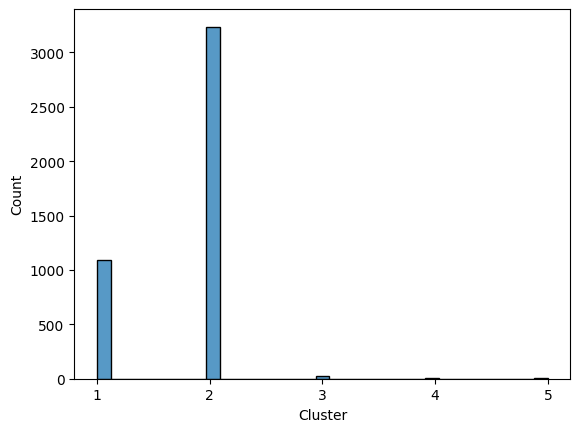

In [35]:
sns.histplot(final_df.Cluster)
plt.xticks(range(1,6))
plt.show()

In [39]:
final_df.groupby('Cluster').agg({'Monetary':'mean',
                                 'Visits':'mean',
                                 'Recency':'mean',
                                'Continent_Encoded':'mean'})

,Monetary,Visits,Recency,Continent_Encoded
Cluster,,,,
1,612.817355,27.998175,244.968066,3.013686
2,2077.439327,106.827000,38.768304,3.001236
3,3078.823571,56.642857,143.678571,1.250000
4,70925.287500,5913.250000,1.000000,3.000000
5,190863.461667,844.166667,6.666667,2.833333
